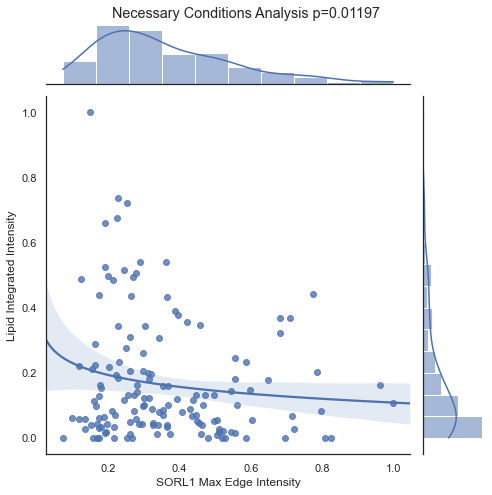

In [19]:
import seaborn as sns
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
def hullarea(x,y):
    xylist=[]
    for k in range(len(x)):
        xylist.append([x[k]/max(x),y[k]/max(y)])
    sortlist=sorted(xylist,key=lambda individual: individual[0],reverse=False)
    hulllist=[sortlist[len(sortlist)-1]]
    for k in reversed(range(len(sortlist))):
        last=hulllist[len(hulllist)-1]
        if sortlist[k][1]>last[1]:
            hulllist.append(sortlist[k])
    Area=0
    for k in range(len(hulllist)-1):
        Area+=(hulllist[k][0]-hulllist[k+1][0])*(1-hulllist[k][1])
    return(Area)
def nca(xlist,ylist,n):
    testarea=hullarea(xlist,ylist)
    counter=0
    yshuffle=ylist.copy()
    for k in range(n):
        random.shuffle(yshuffle)
        if hullarea(xlist,yshuffle)>testarea:
            counter+=1
    return(counter/n)
table=[a for a in csv.reader(open('Speckle_SORL1BODIPYIBA1_MicroNuc.csv'))]
for m in range(1,len(table[0])):
    lipid=[]
    sorl1=[]
    for k in range(1,len(table)):
        if table[k][5]!='nan' and table[k][19]!='nan':
            lipid.append(float(table[k][5]))
            sorl1.append(float(table[k][19]))
pval=nca(sorl1,lipid,1000)
xplot=[]
yplot=[]
for k in range(len(lipid)):
    xplot.append(sorl1[k]/max(sorl1))
    yplot.append(lipid[k]/max(lipid))
df = pd.DataFrame(list(zip(yplot,xplot)), columns =['Lipid Integrated Intensity', 'SORL1 Max Edge Intensity'])
#df = pd.DataFrame(list(zip(yplot,xplot)), columns =['Lipid Mean Intensity', 'SORL1 Mean Intensity'])
sns.set_theme(style="white")
p = sns.jointplot(y='Lipid Integrated Intensity', x='SORL1 Max Edge Intensity', data=df,
                  kind="reg", truncate=False,
                  color="b", height=7, logx=True)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
fig_width, fig_height = plt.gcf().get_size_inches()
p.fig.suptitle('Necessary Conditions Analysis p='+str(0.01197))
plt.savefig('SORL1Lipidlogx.pdf')

In [3]:
table=[a for a in csv.reader(open('20X_SORL1_IBA1_PLIN2_MicroNuc.csv'))]
for m in range(1,len(table[0])):
    plin2=[]
    sorl1=[]
    for k in range(1,len(table)):
        if table[k][4]!='nan' and table[k][13]!='nan':
            plin2.append(float(table[k][4]))
            sorl1.append(float(table[k][13]))

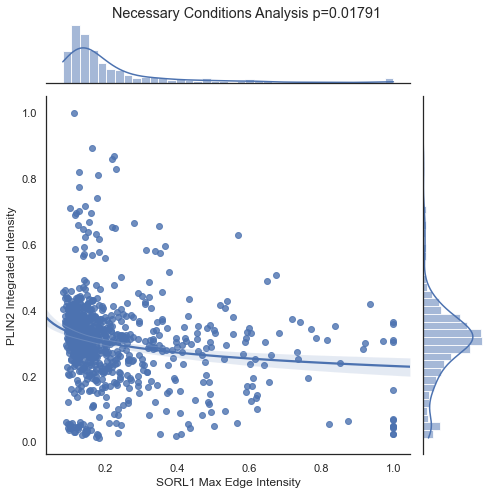

In [14]:
sns.set_theme(style="white")
xplot=[]
yplot=[]
for k in range(len(sorl1)):
    xplot.append(sorl1[k]/max(sorl1))
    yplot.append(plin2[k]/max(plin2))
df = pd.DataFrame(list(zip(yplot,xplot)), columns =['PLIN2 Integrated Intensity', 'SORL1 Max Edge Intensity'])
p = sns.jointplot(y='PLIN2 Integrated Intensity', x='SORL1 Max Edge Intensity', data=df,
                  kind="reg", truncate=False,
                  color="b", height=7, logx=True)
p.fig.suptitle('Necessary Conditions Analysis p='+str(0.01791))
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
fig_width, fig_height = plt.gcf().get_size_inches()
plt.savefig('PLIN2SORL1logx.pdf')

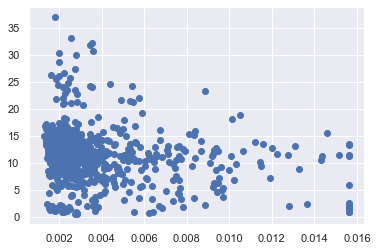

In [33]:
#plin2 sorl1 nca pval=0.01791

In [ ]:
xplot=[]
yplot=[]
for k in range(len(lipid)):
    xplot.append(sorl1[k]/max(sorl1))
    yplot.append(lipid[k]/max(lipid))
#df = pd.DataFrame(list(zip(yplot,xplot)), columns =['Lipid Integrated Intensity', 'SORL1 Max Edge Intensity'])
df = pd.DataFrame(list(zip(yplot,xplot)), columns =['PLIN2 Integrated Intensity', 'SORL1 Max Edge Intensity'])
sns.set_theme(style="darkgrid")
p = sns.jointplot(y='Lipid Mean Intensity', x='SORL1 Mean Intensity', data=df,
                  kind="reg", truncate=False,
                  color="b", height=7, order=2)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
fig_width, fig_height = plt.gcf().get_size_inches()
p.fig.suptitle("Necessary Condition Analysis p="+str(pval))
plt.savefig('test.pdf')

In [22]:
table=[a for a in csv.reader(open('plin2data_filtered.csv'))]

In [52]:
table=[a for a in csv.reader(open('Speckle_SORL1BODIPYIBA1_MicroNuc.csv'))]

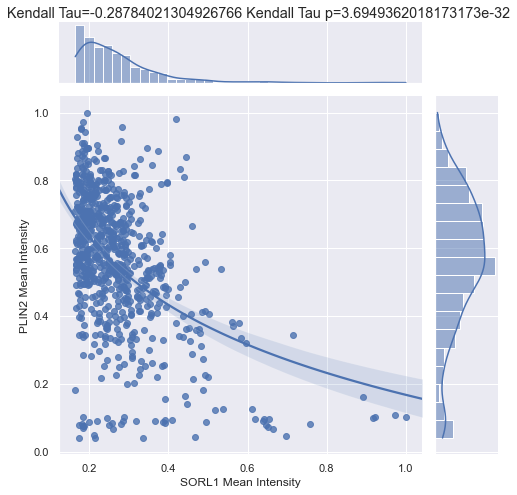

In [51]:
plin2=[]
sorl1=[]
for m in range(1,len(table)):
    plin2.append(float(table[m][0]))
    sorl1.append(float(table[m][1]))
xplot=[]
yplot=[]
for k in range(len(sorl1)):
    xplot.append(sorl1[k]/max(sorl1))
    yplot.append(plin2[k]/max(plin2))
df = pd.DataFrame(list(zip(yplot,xplot)), columns =['PLIN2 Mean Intensity', 'SORL1 Mean Intensity'])
p = sns.jointplot(y='PLIN2 Mean Intensity', x='SORL1 Mean Intensity', data=df,
                  kind="reg", truncate=False,
                  color="b", height=7, logx=True)
p.fig.suptitle('Kendall Tau='+str(tau)+' Kendall Tau p='+str(p_value))
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)
fig_width, fig_height = plt.gcf().get_size_inches()
plt.savefig('PLIN2SORL1logx.pdf')